In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving wisconsin_test.csv to wisconsin_test.csv
Saving water.csv to water.csv
Saving milk_production.csv to milk_production.csv
Saving df3.csv to df3.csv
Saving df2.csv to df2.csv
Saving df1.csv to df1.csv
Saving daily_rates.csv to daily_rates.csv
Saving co2.csv to co2.csv
Saving aus_employment.csv to aus_employment.csv


In [3]:
milk_production = pd.read_csv('milk_production.csv', index_col='date', parse_dates=True)
milk_production = milk_production.asfreq('MS')
milk_production.head()

,pounds_per_cow
date,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


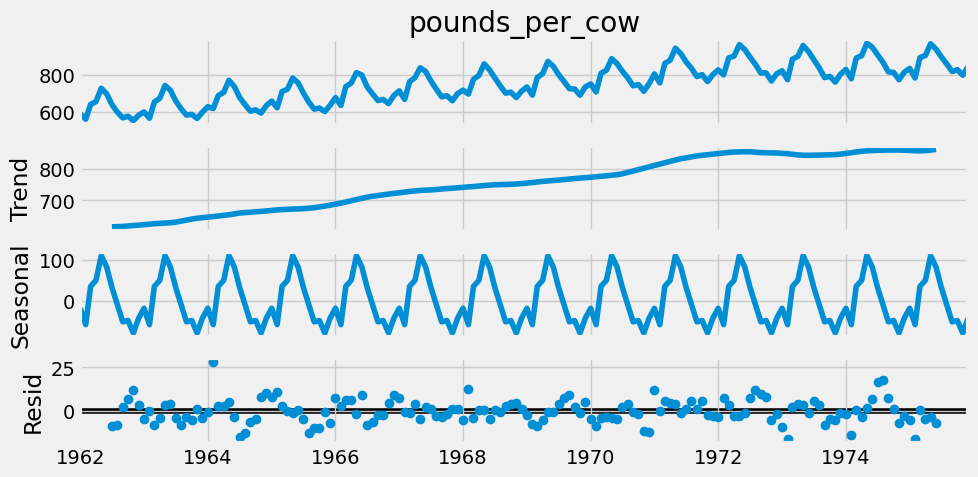

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(milk_production['pounds_per_cow'], period=12)

# Plot decomposition
decomp.plot();
plt.tight_layout();

In [5]:
water = pd.read_csv('water.csv', index_col='date', parse_dates=True)
water = water.asfreq('MS')
water.head()

,water_consumers
date,
1983-01-01,24963
1983-02-01,27380
1983-03-01,32588
1983-04-01,25511
1983-05-01,32313


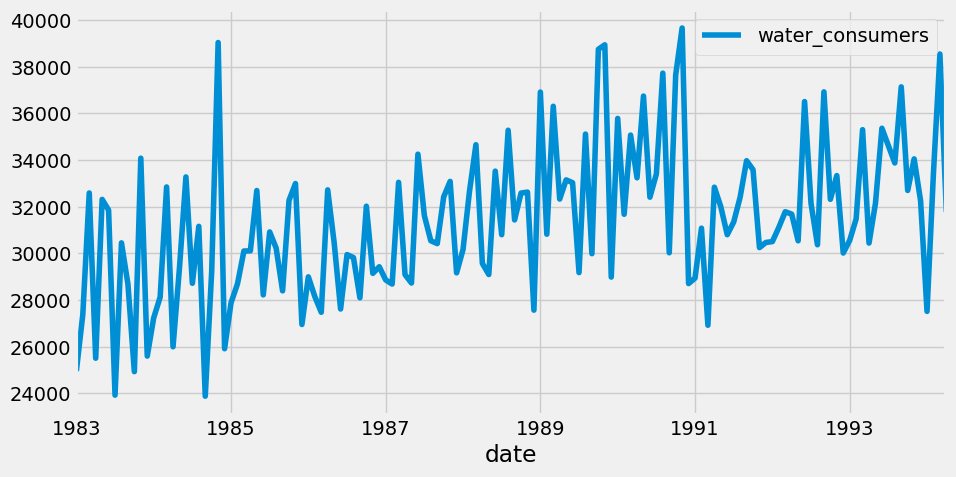

In [6]:
water.plot();

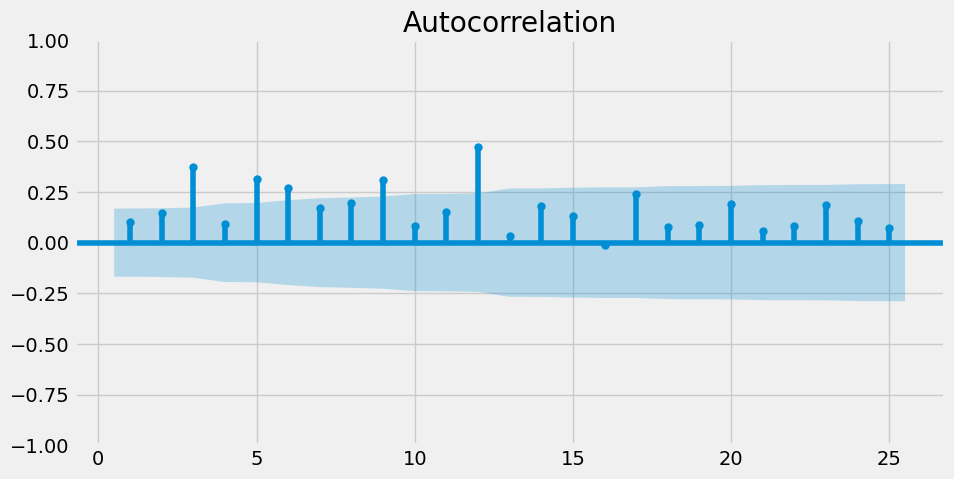

In [7]:
from statsmodels.graphics.tsaplots import plot_acf

# Create figure and subplot
fig, ax1 = plt.subplots()

# Plot the ACF on ax1
plot_acf(water['water_consumers'], lags=25, zero=False, ax=ax1);

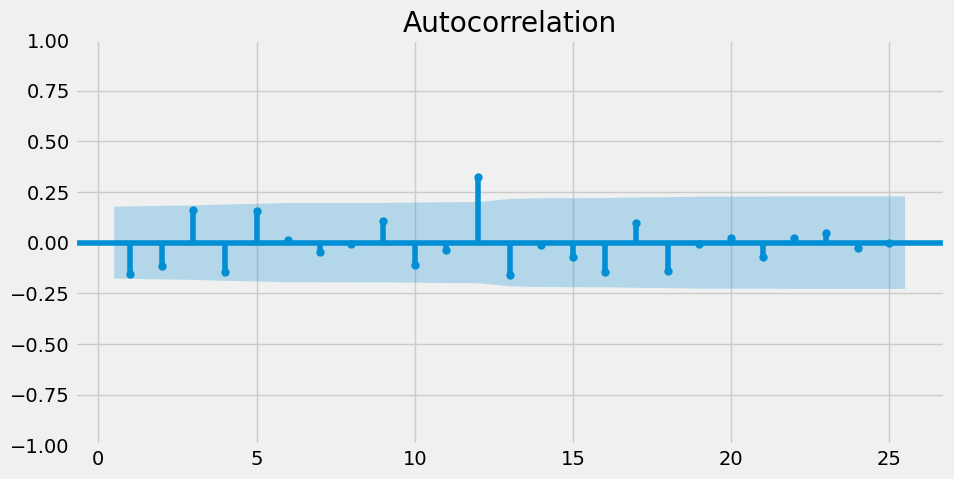

In [8]:
# Subtract the rolling mean
water_2 = water - water.rolling(15).mean()

# Drop the NaN values
water_2 = water_2.dropna()

# Create figure and subplots
fig, ax1 = plt.subplots()

# Plot the ACF
plot_acf(water_2['water_consumers'], lags=25, zero=False, ax=ax1);

In [13]:
df1 = pd.read_csv('df1.csv', index_col=0, parse_dates=True)
df2 = pd.read_csv('df2.csv', index_col=0, parse_dates=True)
df3 = pd.read_csv('df3.csv', index_col=0, parse_dates=True)

df1 = df1.asfreq('d')
df2 = df2.asfreq('d')
df3 = df3.asfreq('d')

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create a SARIMAX model
model = SARIMAX(df1, order=(1, 0, 0), seasonal_order=(1, 1, 0, 7))

# Fit the model
results = model.fit()

# Print the results summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 Y   No. Observations:                   90
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 7)   Log Likelihood                -556.243
Date:                           Sat, 05 Jul 2025   AIC                           1118.486
Time:                                   13:58:02   BIC                           1125.742
Sample:                               01-01-2013   HQIC                          1121.401
                                    - 03-31-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1032      0.103      1.002      0.316      -0.099       0.305
ar.S.L7        0.2781      0.104      2.665      0.008       0.074       0.483
sigma2      3.858e+04   7224.679      5.340      0.000    2.44e+04    5.27e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.69
Prob(Q):                              0.97   Prob(JB):                         0.43
Heteroskedasticity (H):               1.35   Skew:                            -0.15
Prob(H) (two-sided):                  0.43   Kurtosis:                         2.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
# Create a SARIMAX model
model = SARIMAX(df2, order=(2, 1, 1), seasonal_order=(1, 0, 0, 4))

# Fit the model
results = model.fit()

# Print the results summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  Y   No. Observations:                   80
Model:             SARIMAX(2, 1, 1)x(1, 0, [], 4)   Log Likelihood                -560.340
Date:                            Sat, 05 Jul 2025   AIC                           1130.679
Time:                                    13:58:11   BIC                           1142.526
Sample:                                01-01-2013   HQIC                          1135.426
                                     - 03-21-2013                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2701      0.162      1.672      0.095      -0.047       0.587
ar.L2          0.5015      0.110      4.560      0.000       0.286       0.717
ma.L1         -0.4271      0.178     -2.401      0.016      -0.776      -0.078
ar.S.L4        0.1075      0.127      0.847      0.397      -0.141       0.356
sigma2       8.45e+04   1.63e+04      5.178      0.000    5.25e+04    1.16e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.95
Prob(Q):                              1.00   Prob(JB):                         0.62
Heteroskedasticity (H):               0.60   Skew:                            -0.07
Prob(H) (two-sided):                  0.20   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
# Create a SARIMAX model
model = SARIMAX(df3, order=(1, 1, 0), seasonal_order=(0, 1, 1, 12))

# Fit the model
results = model.fit()

# Print the results summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    Y   No. Observations:                  100
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -521.376
Date:                              Sat, 05 Jul 2025   AIC                           1048.752
Time:                                      13:58:20   BIC                           1056.149
Sample:                                  01-01-2013   HQIC                          1051.730
                                       - 04-10-2013                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4236      0.090      4.719      0.000       0.248       0.600
ma.S.L12      -0.0898      0.116     -0.776      0.438      -0.317       0.137
sigma2      9347.1462   1407.490      6.641      0.000    6588.516    1.21e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.02
Prob(Q):                              0.86   Prob(JB):                         0.99
Heteroskedasticity (H):               0.77   Skew:                             0.02
Prob(H) (two-sided):                  0.48   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
aus_employment = pd.read_csv('aus_employment.csv', index_col='date', parse_dates=True)
aus_employment = aus_employment.asfreq('MS')
aus_employment.head()

,people_employed
date,
1978-01-01,5985.7
1978-02-01,6040.6
1978-03-01,6054.2
1978-04-01,6038.3
1978-05-01,6031.3


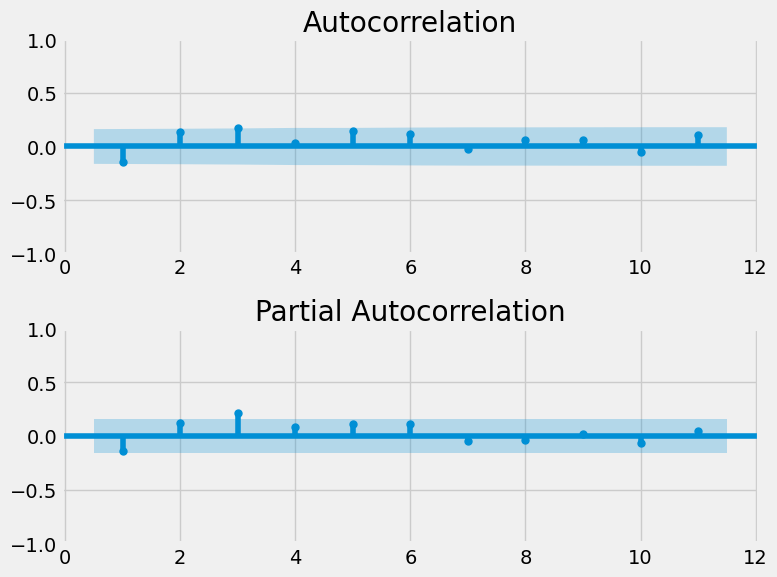

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf

# Take the first and seasonal differences and drop NaNs
aus_employment_diff = aus_employment.diff().diff(12).dropna()

# Create the figure
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, lags=11, zero=False, ax=ax1);

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, lags=11, zero=False, ax=ax2);
plt.tight_layout();

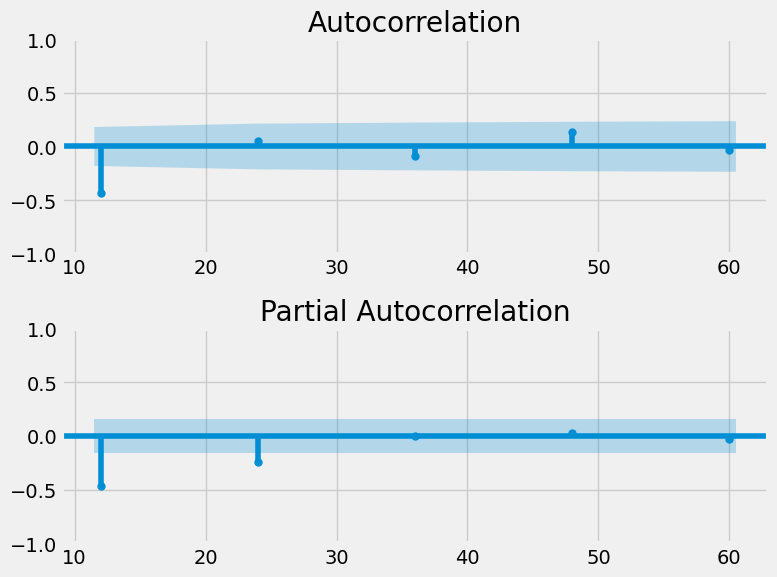

In [19]:
# Make list of lags
lags = [12, 24, 36, 48, 60]

# Create the figure
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(aus_employment_diff, lags=lags, zero=False, ax=ax1);

# Plot the PACF on ax2
plot_pacf(aus_employment_diff, lags=lags, zero=False, ax=ax2);
plt.tight_layout();

In [20]:
wisconsin_test = pd.read_csv('wisconsin_test.csv', index_col='date', parse_dates=True)
wisconsin_test = wisconsin_test.asfreq('MS')
dates = wisconsin_test.index
wisconsin_test.head()

,number_in_employment
date,
1973-10-01,374.5
1973-11-01,380.2
1973-12-01,384.6
1974-01-01,360.6
1974-02-01,354.4


In [21]:
model = SARIMAX(wisconsin_test, order=(3, 1, 2), trend='c',
                enforce_stationarity=True, enforce_invertibility=True)

arima_results = model.fit()

In [22]:
model = SARIMAX(wisconsin_test, order=(0, 1, 1), seasonal_order=(1, 1, 1, 12), trend='c',
                enforce_stationarity=True, enforce_invertibility=True)

sarima_results = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [23]:
arima_results.specification

{'seasonal_periods': 0,
 'measurement_error': False,
 'time_varying_regression': False,
 'simple_differencing': False,
 'enforce_stationarity': True,
 'enforce_invertibility': True,
 'hamilton_representation': False,
 'concentrate_scale': False,
 'trend_offset': 1,
 'order': (3, 1, 2),
 'seasonal_order': (0, 0, 0, 0),
 'k_diff': 1,
 'k_seasonal_diff': 0,
 'k_ar': 3,
 'k_ma': 2,
 'k_seasonal_ar': 0,
 'k_seasonal_ma': 0,
 'k_ar_params': 3,
 'k_ma_params': 2,
 'trend': 'c',
 'k_trend': 1,
 'k_exog': 0,
 'mle_regression': False,
 'state_regression': False}

In [24]:
sarima_results.specification

{'seasonal_periods': 12,
 'measurement_error': False,
 'time_varying_regression': False,
 'simple_differencing': False,
 'enforce_stationarity': True,
 'enforce_invertibility': True,
 'hamilton_representation': False,
 'concentrate_scale': False,
 'trend_offset': 1,
 'order': (0, 1, 1),
 'seasonal_order': (1, 1, 1, 12),
 'k_diff': 1,
 'k_seasonal_diff': 1,
 'k_ar': 0,
 'k_ma': 1,
 'k_seasonal_ar': 12,
 'k_seasonal_ma': 12,
 'k_ar_params': 0,
 'k_ma_params': 1,
 'trend': 'c',
 'k_trend': 1,
 'k_exog': 0,
 'mle_regression': False,
 'state_regression': False}

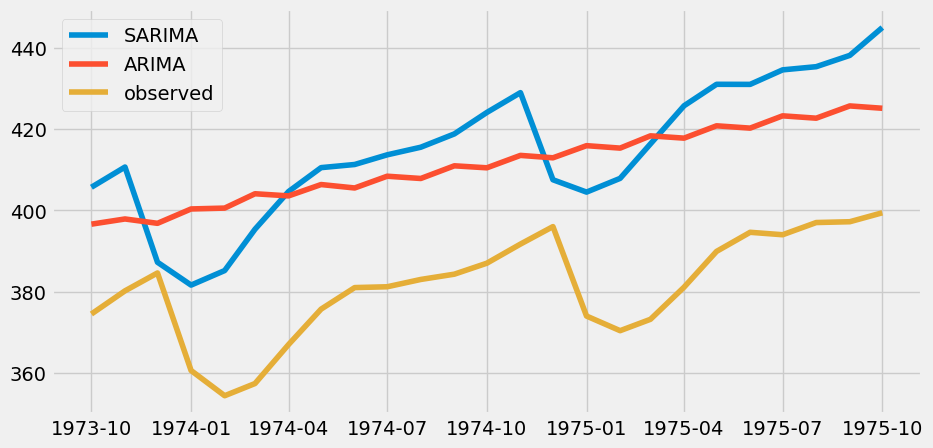

In [25]:
# Create ARIMA mean forecast
arima_pred = arima_results.get_forecast(25)
arima_mean = arima_pred.predicted_mean

# Create SARIMA mean forecast
sarima_pred = sarima_results.get_forecast(25)
sarima_mean = sarima_pred.predicted_mean

# Plot mean ARIMA and SARIMA predictions and observed
plt.plot(dates, sarima_mean, label='SARIMA');
plt.plot(dates, arima_mean, label='ARIMA');
plt.plot(wisconsin_test, label='observed');
plt.legend();

In [6]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.1 MB/s eta 0:00:00


In [14]:
# Create model
model2 = pm.auto_arima(df2,
                       seasonal=False,
                       d=1,
                       trend='c',
                      max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

# Print model summary
print(model2.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1131.956, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1153.963, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1155.355, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1155.747, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1153.963, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1136.103, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1130.992, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1149.020, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1132.526, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1130.992, Time=0.13 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 1.593 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   80
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -560.496
Date:                Sat, 05 Jul 2025   AIC                           1130.992
Time:                        14:12:08   BIC                           1142.840
Sample:                    01-01-2013   HQIC                          1135.739
                         - 03-21-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -9.5411     20.071     -0.475      0.635     -48.879 

In [15]:
# Create model for SARIMAX(p,1,q)(P,1,Q)7
model3 = pm.auto_arima(df3,
                      seasonal=True, m=7,
                      d=1, D=1,
                      start_p=1, start_q=1,
                      max_p=1, max_q=1,
                      max_P=1, max_Q=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

# Print model summary
print(model3.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=inf, Time=5.98 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=1593.897, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,0)[7]             : AIC=1583.263, Time=1.41 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=1.72 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=1593.659, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=1.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,1,1)[7]             : AIC=inf, Time=1.16 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=1581.972, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,1,1)[7]             : AIC=inf, Time=0.89 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,1,1)[7]             : AIC=1575.886, Time=2.48 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,1,1)[7]             : AIC=inf, Time=3.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,1,1)[7] intercept   : AIC=1577.811, Time=0.84 sec

Best model:  ARIMA(0,1,0)(0,1,1)[7]          
Total fit time: 19.296 seconds
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  100
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 7)   Log Likelihood                -785.943
Date:                             Sat, 05 Jul 2025   AIC                           1575.886
Time:                                     14:13:39   BIC                           1580.930
Sample:                                 01-01-2013   HQIC                          1577.922
                                      - 04-10-2013                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

In [16]:
# Create model for SARIMAX(p,1,q)(P,1,Q)7
model3 = pm.auto_arima(df1,
                      seasonal=True, m=7,
                      d=1, D=1,
                      start_p=1, start_q=1,
                      max_p=1, max_q=1,
                      max_P=1, max_Q=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

# Print model summary
print(model3.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=inf, Time=1.41 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=1154.789, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,0)[7]             : AIC=1138.551, Time=0.70 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.30 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=1141.986, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,1)[7]             : AIC=1137.143, Time=0.56 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,1,1)[7]             : AIC=1140.520, Time=1.01 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,1,1)[7]             : AIC=1151.352, Time=0.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,1,1)[7]             : AIC=inf, Time=0.62 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,1)[7] intercept   : AIC=1139.134, Time=0.89 sec

Best model:  ARIMA(1,1,0)(1,1,1)[7]          
Total fit time: 6.194 seconds
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   90
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 7)   Log Likelihood                -564.571
Date:                             Sat, 05 Jul 2025   AIC                           1137.143
Time:                                     14:13:55   BIC                           1146.769
Sample:                                 01-01-2013   HQIC                          1141.008
                                      - 03-31-2013                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------

In [20]:
import pmdarima as pm

model1 = pm.auto_arima(df1,
                       seasonal=True, m=7,
                       d=0, D=1,
                       max_p=2, max_q=2,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[7] intercept   : AIC=inf, Time=3.60 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=1124.433, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=1120.434, Time=2.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=1122.218, Time=2.03 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=1122.596, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=1125.048, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=1119.909, Time=1.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=1121.791, Time=1.62 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=1120.954, Time=2.32 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=1119.066, Time=0.33 sec
 ARIMA(0,0,0)(1,1,0)[7] intercept   : AIC=1119.294, Time=0.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(2,1,1)[7] intercept   : AIC=1120.813, Time=0.41 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,1,1)[7] intercept   : AIC=1120.054, Time=0.24 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=1119.937, Time=0.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(0,0,0)(2,1,0)[7]             : AIC=1117.139, Time=0.12 sec
 ARIMA(0,0,0)(1,1,0)[7]             : AIC=1117.350, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(2,1,1)[7]             : AIC=1118.863, Time=0.33 sec
 ARIMA(0,0,0)(1,1,1)[7]             : AIC=1118.127, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,1,0)[7]             : AIC=1117.973, Time=0.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(2,1,0)[7]             : AIC=1117.986, Time=0.53 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,1,0)[7]             : AIC=1119.973, Time=0.71 sec

Best model:  ARIMA(0,0,0)(2,1,0)[7]          
Total fit time: 17.477 seconds


In [21]:
import joblib

# Set model name
filename='candy_model.pkl'

# Pickle it
joblib.dump(model1, filename)

# Load the model back in
loaded_model = joblib.load(filename)

# Update the model
# loaded_model.update(df)

In [22]:
co2 = pd.read_csv('co2.csv', index_col='date', parse_dates=True)
co2 = co2.asfreq('MS')
co2.head()

,CO2_ppm
date,
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.50
1958-06-01,317.10
1958-07-01,315.86


In [23]:
# Create model object
model = SARIMAX(co2, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12), trend='c')

# Fit model
results = model.fit()

In [24]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            CO2_ppm   No. Observations:                  727
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -179.718
Date:                            Sat, 05 Jul 2025   AIC                            369.437
Time:                                    14:18:42   BIC                            392.291
Sample:                                03-01-1958   HQIC                           378.263
                                     - 09-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0017      0.001      2.805      0.005       0.001       0.003
ar.L1          0.2414      0.078      3.077      0.002       0.088       0.395
ma.L1         -0.6081      0.065     -9.302      0.000      -0.736      -0.480
ma.S.L12      -0.8820      0.019    -45.505      0.000      -0.920      -0.844
sigma2         0.0944      0.005     20.751      0.000       0.085       0.103
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 6.19
Prob(Q):                              0.78   Prob(JB):                         0.05
Heteroskedasticity (H):               1.13   Skew:                             0.00
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

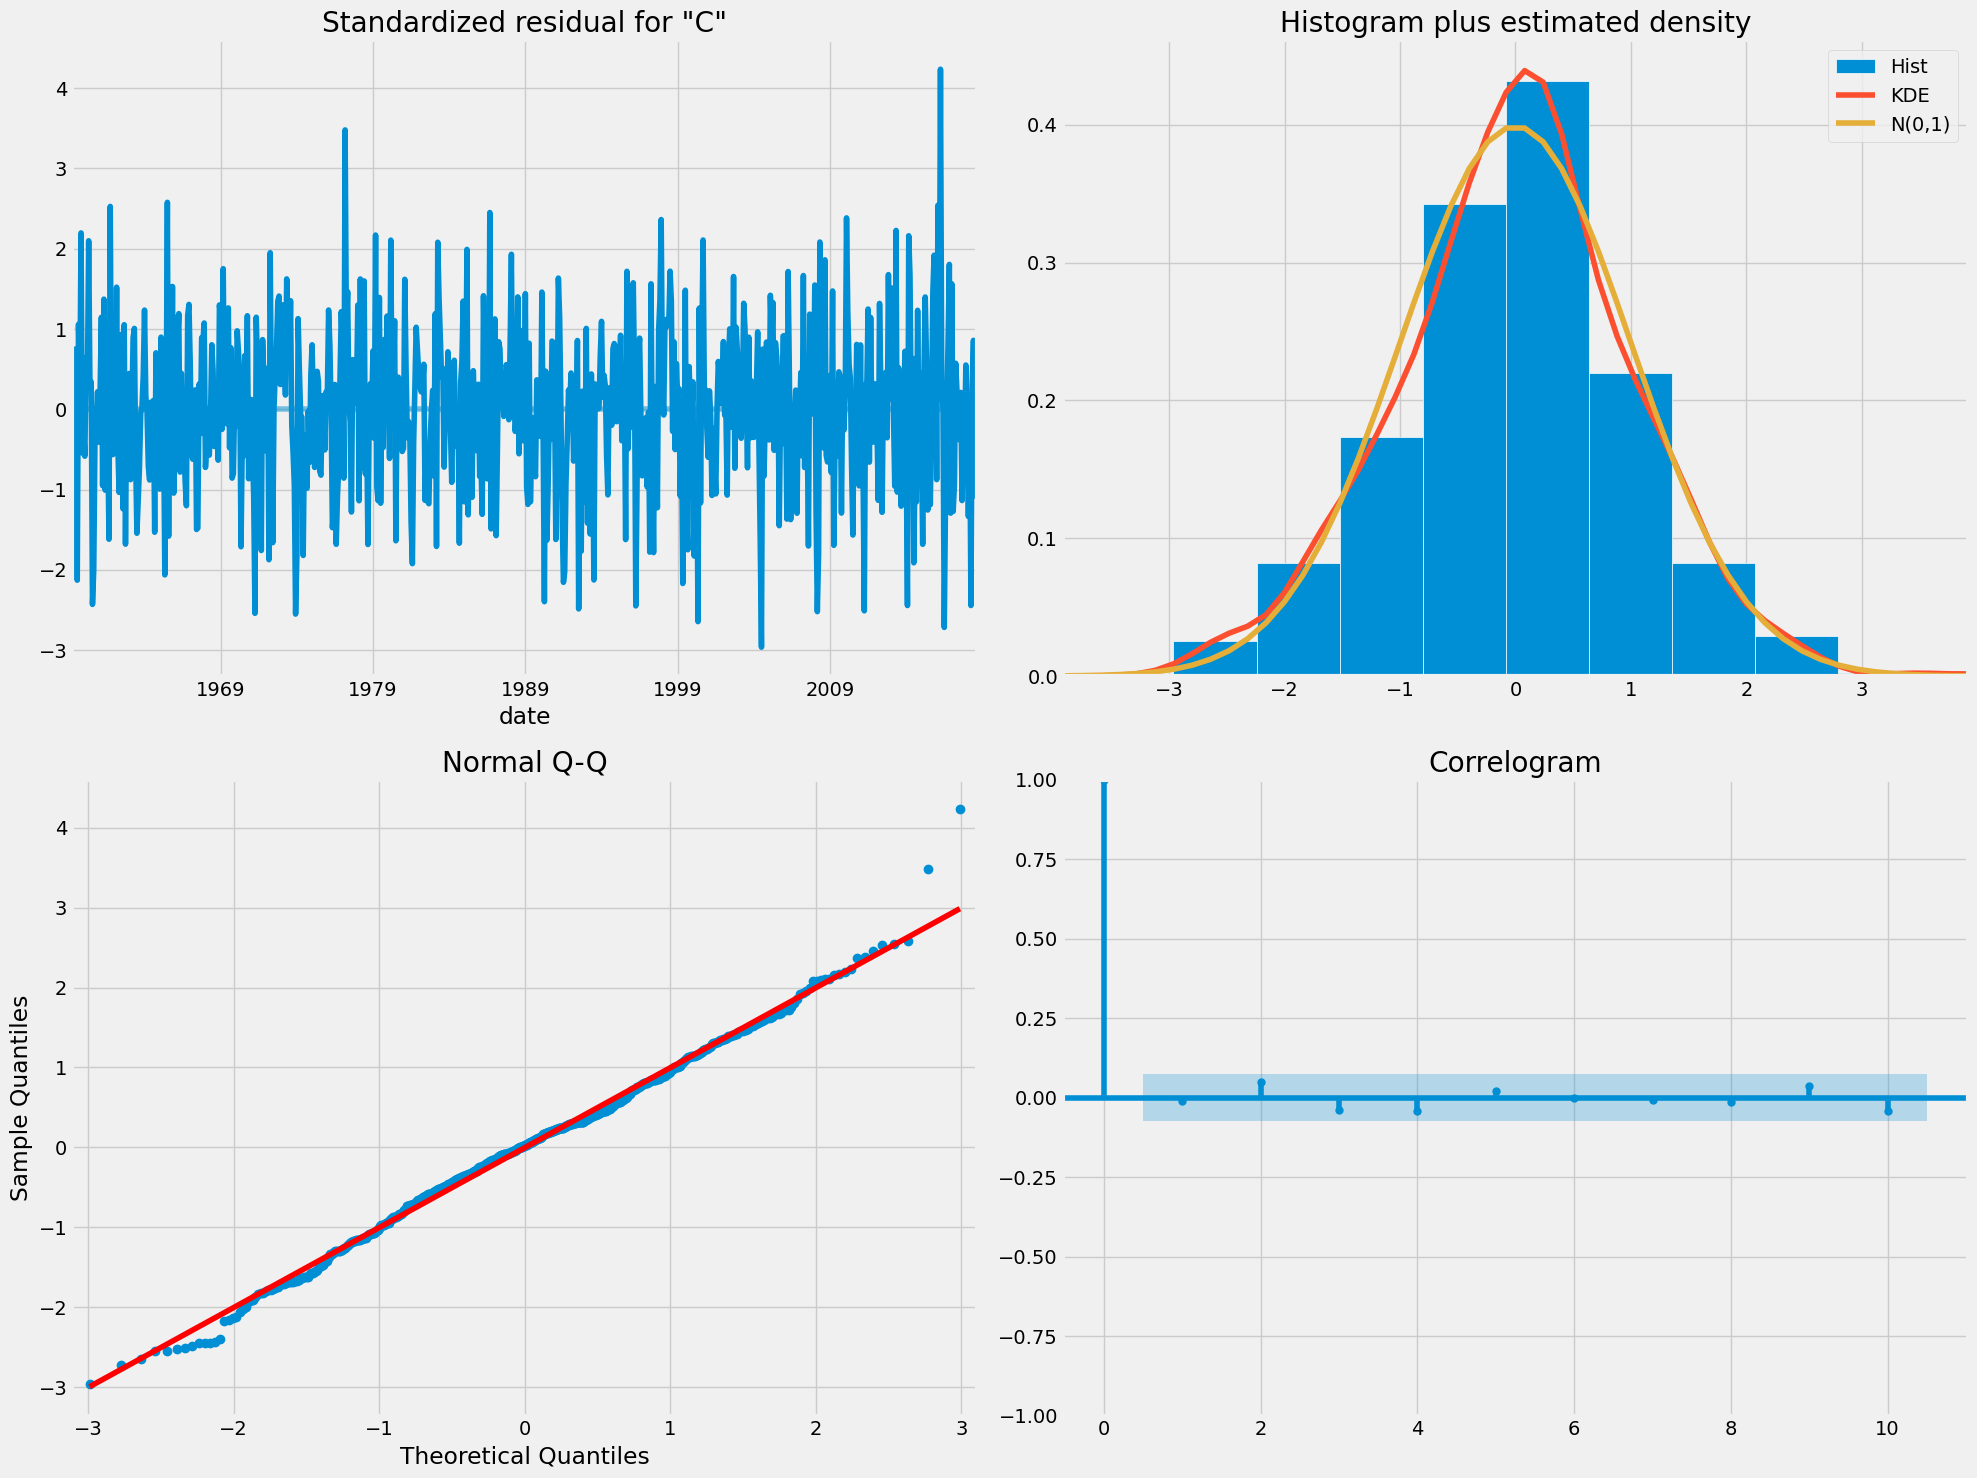

In [25]:
# Plot common diagnostics
results.plot_diagnostics(figsize=(20, 15));
plt.tight_layout();

FileNotFoundError: [Errno 2] No such file or directory: '../images/co2_predicted.png'

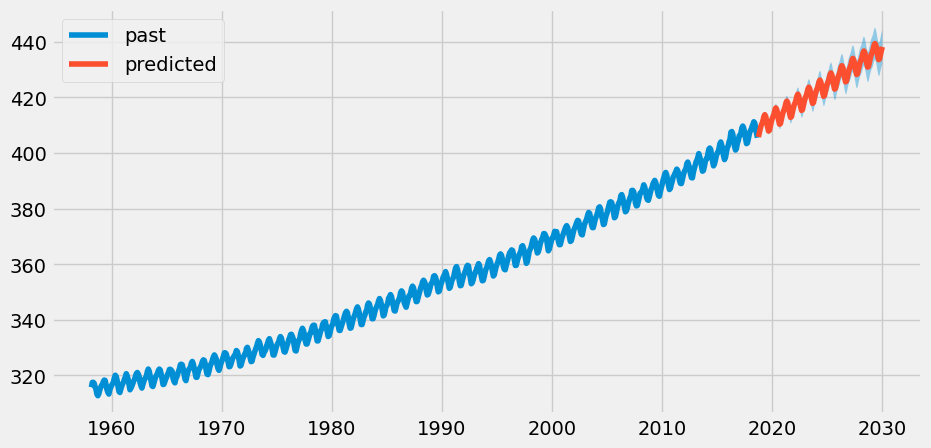

In [26]:
# Create forecast object
forecast_object = results.get_forecast(136)

# Extract predicted mean attribute
mean = forecast_object.predicted_mean

# Calculate the confidence intervals
conf_int = forecast_object.conf_int()

# Extract the forecast dates
dates = mean.index

plt.figure()

# Plot past CO2 levels
plt.plot(co2.index, co2, label='past');

# Plot the prediction means as line
plt.plot(dates, mean, label='predicted');

# Shade between the confidence intervals
plt.fill_between(dates, conf_int.loc[:, 'lower CO2_ppm'],
                 conf_int.loc[:, 'upper CO2_ppm'], alpha=0.4);

# Plot legend
plt.legend();
plt.savefig('../images/co2_predicted.png')

In [27]:
# Print last predicted mean
print(mean.iloc[-1])

# Print last confidence interval
print(conf_int.iloc[-1])

438.1948454400886
lower CO2_ppm    432.112446
upper CO2_ppm    444.277245
Name: 2030-01-01 00:00:00, dtype: float64
